In [8]:
import pandas as pd
import numpy as np

# Задание 

В файле `mnist_784.csv` находится классический набор данных с картинками рукописных цифр. 

In [2]:
mnist = pd.read_csv("mnist_784.csv")

In [3]:
pic = np.array(mnist.drop('class', axis=1).loc[0])

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

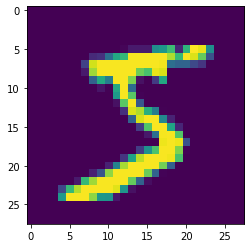

In [5]:
plt.imshow(pic.reshape(28, 28))

Необходимо применить PCA к набору данных и найти 10 первых главных компонент. Важно - в наборе данных есть колонка `class` - она очевидно не должна включаться в качестве признака, ее нужно вначале удалить из набора данных. Результат необходимо сохранить в файле `result.json`.

In [7]:
target = mnist['class'].copy()

In [10]:
mnist.drop('class', inplace=True, axis=1)

In [13]:
data = mnist.values

In [24]:
from sklearn.decomposition import PCA, TruncatedSVD

In [25]:
# pca = PCA(n_components=10, random_state=0)
pca = TruncatedSVD(n_components=200, random_state=0)

transformed_data = pca.fit_transform(data)

In [56]:
top_components = pca.components_[:10]

In [51]:
# Пример формата ответа

import json

with open('result.json', 'w') as f:
    f.write(json.dumps(top_components.tolist()))

Дополнительное задание без оценивания - визуализируйте полученные компоненты. Так как найденные компоненты - это также вектора длинной 784, то мы также можем их нарисовать как картинки и посмотреть, какие регионы картинки являются наиболее информативными.

In [47]:
def show_as_pic(arr: np.array):
    plt.imshow(arr.reshape(28, 28))